# 산점도

두 개의 연속형 변수에 대한 상관 관계를 파악하는데 유용하게 사용한다.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
iris = pd.read_csv('./data/iris.csv')
tips = pd.read_csv('./data/tips.csv')

### Matplotlib를 이용하여 산점도 그리기

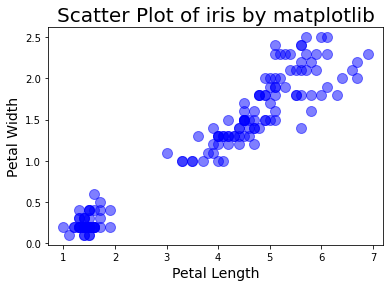

In [3]:
plt.plot('petal_length',  # x
         'petal_width',  # y
         data=iris, 
         linestyle='none', 
         marker='o', 
         markersize=10,
         color='blue', 
         alpha=0.5)

plt.title('Scatter Plot of iris by matplotlib', fontsize=20)
plt.xlabel('Petal Length', fontsize=14)
plt.ylabel('Petal Width', fontsize=14)
plt.show()

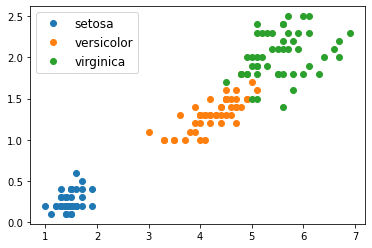

In [4]:
# 그룹별 산점도 그리기 
groups = iris.groupby('species')

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.petal_length, 
            group.petal_width, 
            marker='o', 
            linestyle='',
            label=name)
ax.legend(fontsize=12, loc='upper left') # legend position

### plot()함수와 scatter()함수 차이
plot()대신에 scatter()를 써서 산점도를 그리는 것도 가능하다.

plot()함수 역시 마커만 보여주는 플롯이 가능하고 속도도 scatter()함수에 비해 더 빠르다. 

하지만, 마커를 그리는데 있어 scatter()함수는 plot()함수에서 제공하지 않는 높은 자유도를 제공하며 다양한 플롯을 그리는 것이 기능하다.

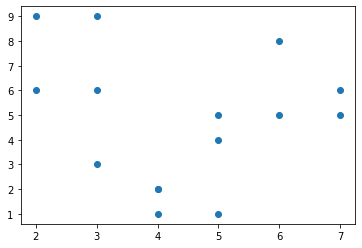

In [5]:
x = np.random.randint(1,10,15)
y = np.random.randint(1,10,15)

plt.plot(x, y,'o')

Text(0, 0.5, 'Tip')

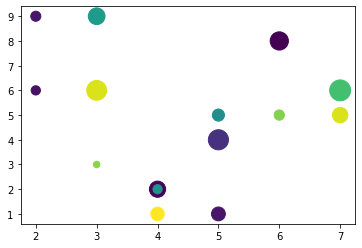

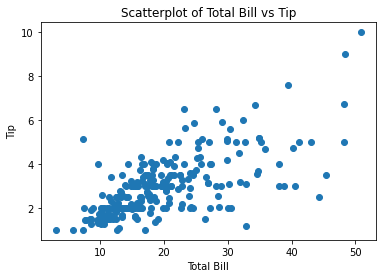

In [6]:
size = np.random.randint(1,500,15)
color =  np.random.randint(1,100,15)
plt.scatter(x,y, s=size, c=color)

scatter_plot = plt.figure() 
axes1 = scatter_plot.add_subplot(1, 1, 1) 
axes1.scatter(tips['total_bill'], tips['tip']) 
axes1.set_title('Scatterplot of Total Bill vs Tip') 
axes1.set_xlabel('Total Bill') 
axes1.set_ylabel('Tip')

## sns.scatterplot

* data : Input data structure
* x : The data position on the x axis
* y : The data position on the y axis
* size : Grouping variable that will produce points with different sizes
* alpha : Transparancy ratio

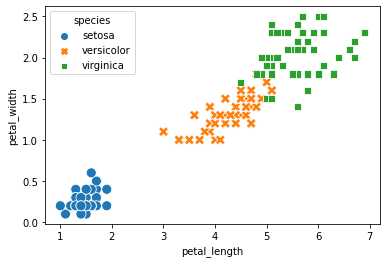

In [7]:
### seaborn으로 산점도 그리기

# 그룹별 산점도
sns.scatterplot(x='petal_length', 
                y='petal_width', 
                hue='species', # different colors by group
                style='species', # different shapes by group
                s=100, # marker size
                data=iris)
plt.show()

### 겹쳐진 점의 표시

산점도 그래프는 점이 겹쳐 보일 경우 점을 구분하기 어렵다는 단점이 있다.

- 이 경우 점의 투명도를 사용하면 겹쳐진 부분을 색깔의 진함으로 표시할 수 있다. 
- hexbin을 사용하면 육각형으로 나뉘어진 면적내의 점의 밀도를 색깔로 표시할 수 있다. 

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

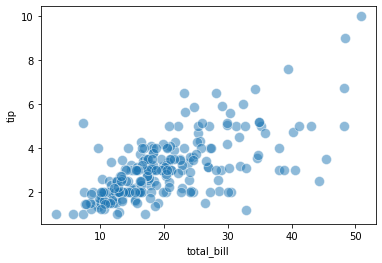

In [8]:
sns.scatterplot(x='total_bill', y='tip', data=tips, alpha=0.5, s = 100)

### pandas hexbin
pandas의 hexbin을 사용할 수 있다. 
- gridsize : x축 방향으로 육각형의 갯수를 지정한다. 값을 크게 할수록 작은 bin이 생성된다. 기본은 100
- 기본적으로 각 육각형 내의 데이터 갯수를 계산한다. 

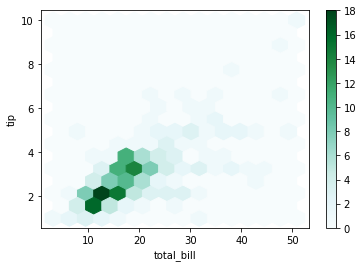

In [36]:
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x="total_bill", y="tip", gridsize=15, ax=ax)


### joint plot

스캐터 플롯을 그리기 위해서는 Seaborn 패키지의 jointplot 명령을 사용할 수 있다. jointplot 명령은 스캐터 플롯뿐 아니라 차트의 가장자리(margin)에 각 변수의 히스토그램도 그린다.

```
jointplot(x="x_name", y="y_name", data=dataframe, kind='scatter')
```

* data 인수에는 대상이 되는 데이터프레임을, 
* x 인수에는 x 변수가 될 데이터프레임의 열 이름 문자열을
* y 인수에는 y 변수가 될 데이터프레임의 열 이름 문자열을 넣는다. 
* kind는 차트의 종류를 지정한다. kind='scatter'이면 스캐터 플롯이다.

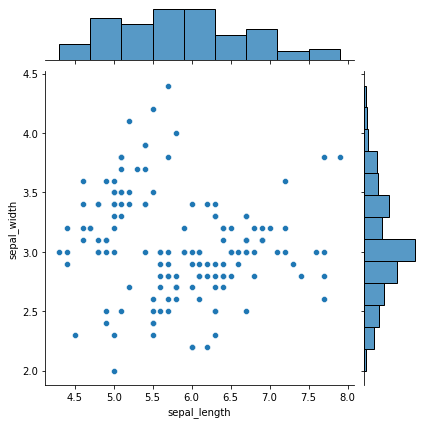

In [10]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)

plt.show()

* 산점도 그래프는 점이 겹쳐 보일 경우 점을 구분하기 어렵다는 단점이 있다.
* 이를 구분하기 쉽게 hexbin을 사용할 수 있다.
* hexbin그래프를 사용하기 위해 kind=hex로 지정한다.

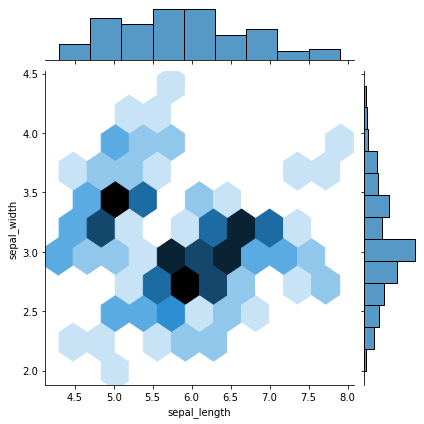

In [11]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="hex")

plt.show()

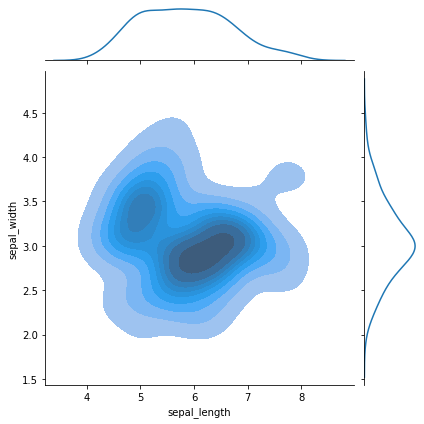

In [12]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde", shade=True)

plt.show()

# 산점도 실습

1. './data/stock_px.csv' 에는 2003년 1월에서 2011년 10월 사이의 미국 주식 주가 데이터를 포함하고 있다. 
```
stock_px = pd.read_csv('./data/stock_px.csv', parse_dates=True, index_col=0)
stock_px.info()
```
* date : 날짜
* AAPL : 애플 주가
* MSFT : 마이크로소프트 주가
* XOM : 엑슨모빌 주가
* SPX : S&P 500 지수 

2. SPX와 MSFT의 산점도를 시각화 하시오.
3. pandas의 hexbin을 사용하여 SPX와 MSFT의 산점도를 시각화 하시오.